In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\Users\sohit\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sohit\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\sohit\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('diabetes.csv',sep=',',header=0,index_col=None)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

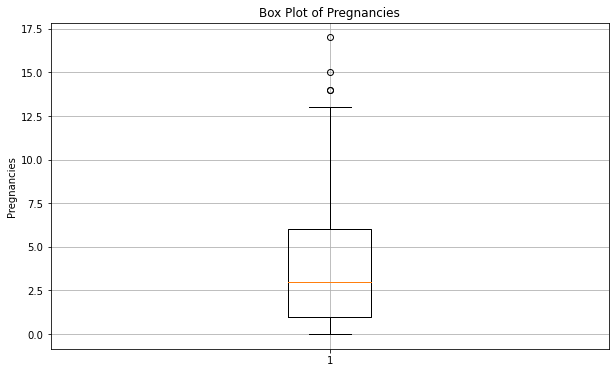

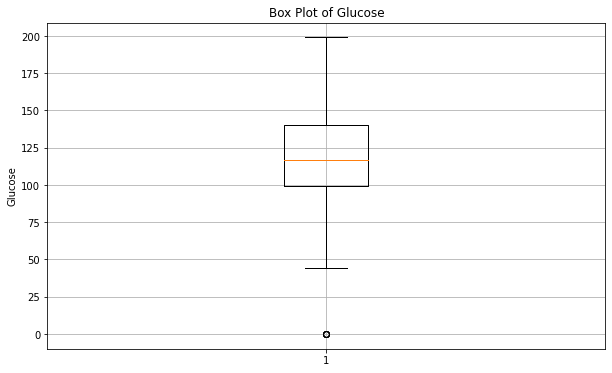

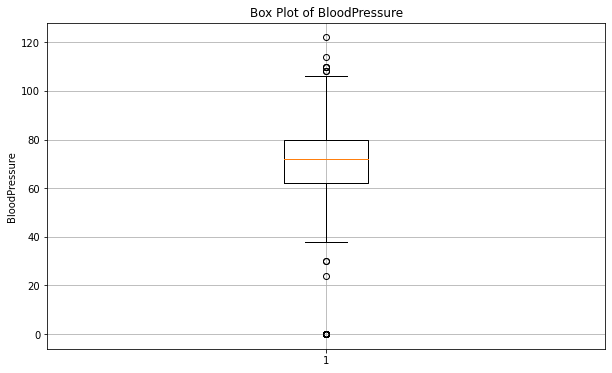

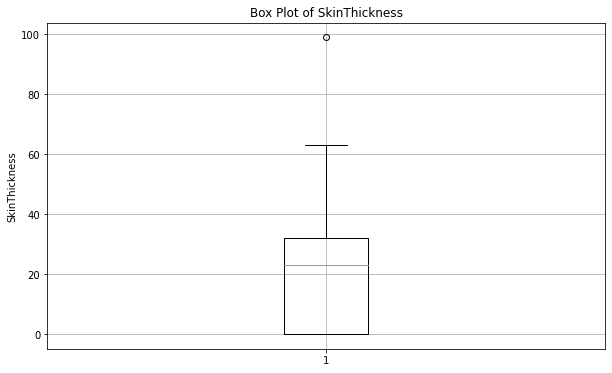

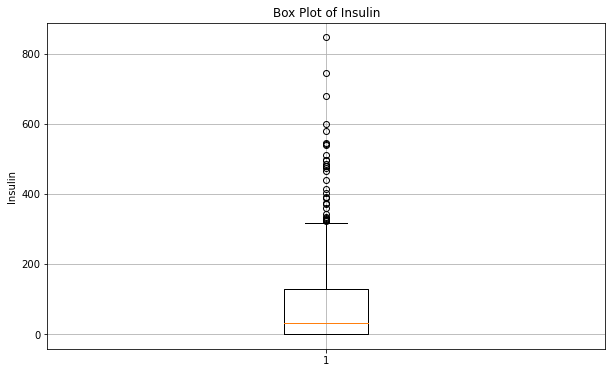

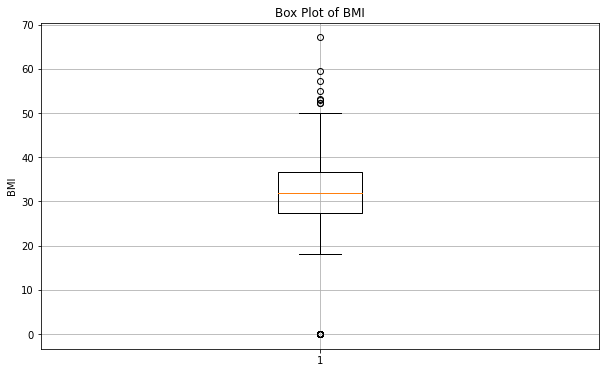

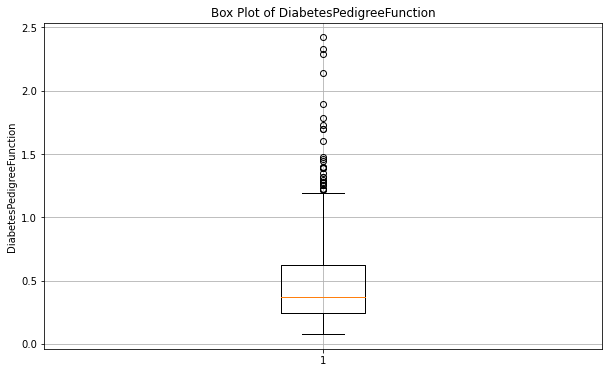

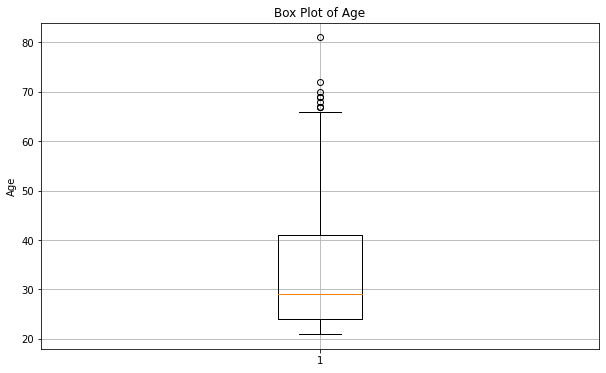

In [3]:
# filter the dataset to remove outliers
# Plot individual box plots for each feature
for column in df.columns[:-1]:  # Exclude the target variable 'Outcome'
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()
# figure out the outliers from the dataset variables and apply them

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to each column
for column in df.columns:
    df = remove_outliers_iqr(df, column)

df_filtered = df
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Pregnancies: Number of pregnancies.

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skin fold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).

Age: Age of the patient (years).

Outcome: Class variable (0 or 1), where 1 indicates the presence of diabetes and 0 indicates the absence of diabetes.

In [43]:
# Filtering the dataset
# it is impossible that a female have a glucose level of zero 
# The least bloodpressure is around 60mm but if a person has less than 40 the it corresponds to medical emergency(40,105)
# BMI range is 18 to 50
# Glucose level 70,200
# pregnancy (0,10)
# skinthickness 1.5,50mm
# insulin range 2,250
# DiabetesPedigreefunction range 
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# feature selection of seperating explonatory and target variables
feats = df_filtered.drop('Outcome',axis=1)
target = df_filtered['Outcome']

In [6]:
# split the data into test and train set
X_train,X_test,y_train,y_test = train_test_split(feats,target,test_size=0.2,random_state=42)

In [7]:
# scale the dataset using standard scaler
sc = StandardScaler()
Xtrainsc = sc.fit_transform(X_train)
Xtestsc = sc.transform(X_test)
#check for any missing values

In [8]:
# DecisionTree classifier, Randomforest
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)

# Train the model
dc_model.fit(Xtrainsc,y_train)

# Performance score of the model 
print(f"Train score {dc_model.score(Xtrainsc,y_train)}")
print(f"Test score {dc_model.score(Xtestsc,y_test)}")

Train score 1.0
Test score 0.7421875


In [9]:
# Predictions and confusion matrix
from sklearn.metrics import classification_report
y_pred = dc_model.predict(Xtestsc)
display(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Prediction']))
print(classification_report(y_test,y_pred))

Prediction,0,1
True,,
0,75,17
1,16,20


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        92
           1       0.54      0.56      0.55        36

    accuracy                           0.74       128
   macro avg       0.68      0.69      0.68       128
weighted avg       0.74      0.74      0.74       128



In [12]:
# Compute ROC curve and AUC for DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

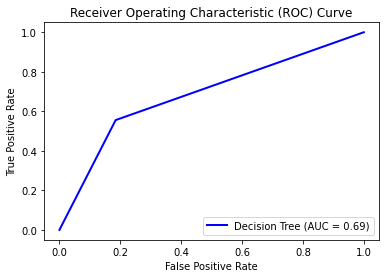

In [14]:
# Plotting the Curves
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

1) Performance evaluation of DecisionTreeModel from ROC and AUC
THe ROC curve starts with a steep increase of True positive rates which indicates a good performance after some threshold The performance falls showing an increase of False positive Rates
The AUC of 0.69 indicates the model has fair ability to predict between the classes but needs a lot of optimization techniques as the ideal value is 1

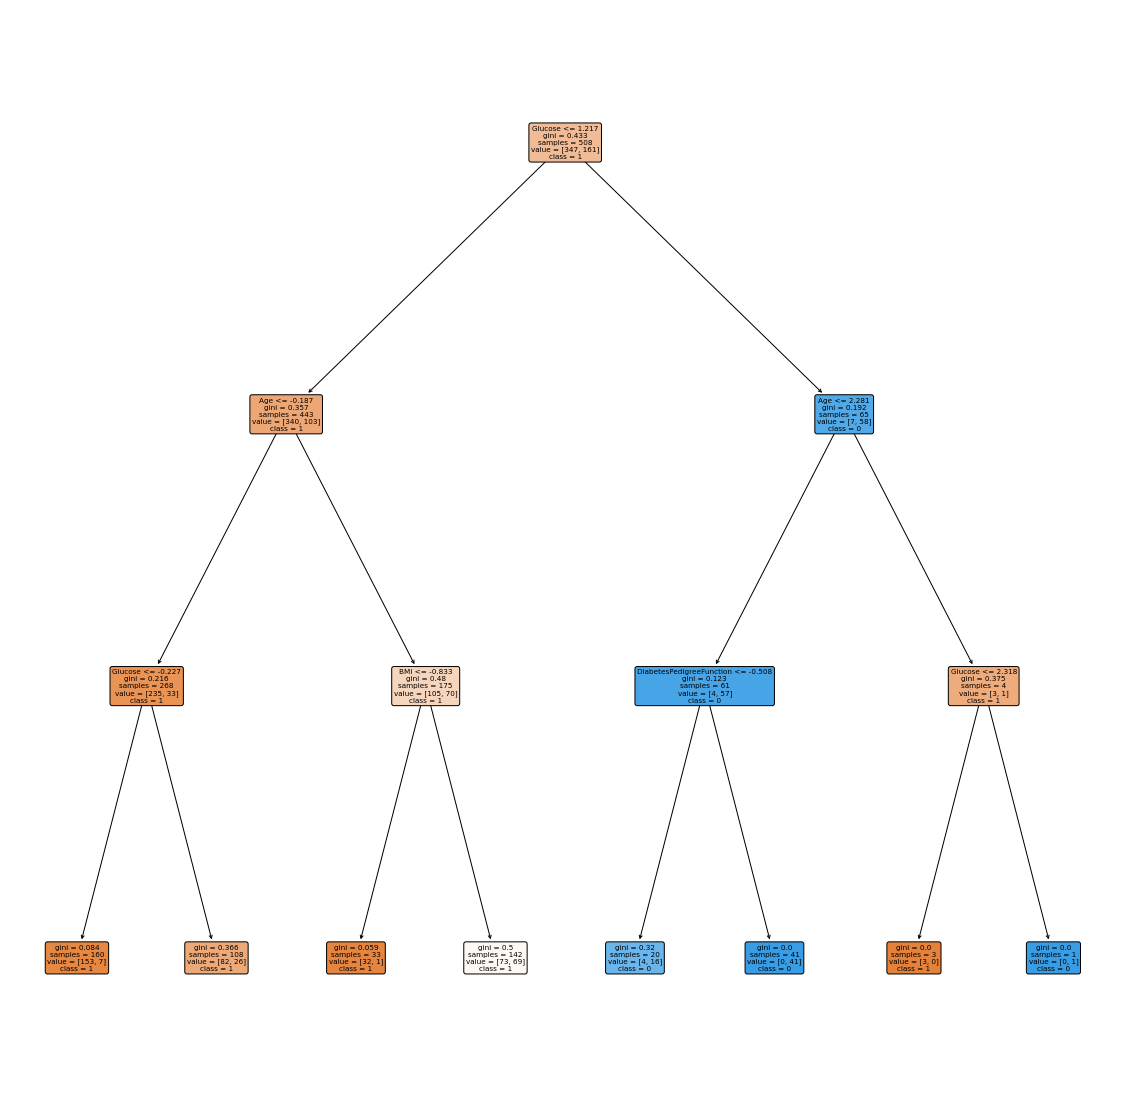

In [31]:
# Plotting Decisiontree to visulaize the overcomes
from sklearn.tree import plot_tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=3) 

clf.fit(Xtrainsc, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
          class_names = ['1','0'],
          filled = True, 
          rounded = True)

plt.show()

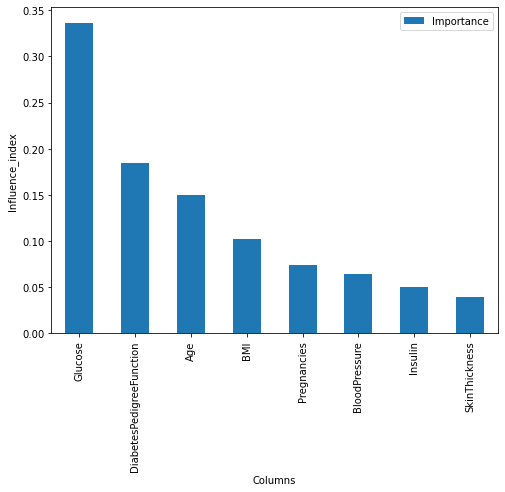

In [15]:
# important parameters and try again
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(dc_model.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.xlabel('Columns')
plt.ylabel('Influence_index')
plt.show()

In [16]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
# rf_model RandomForest
# Train the model
rf_model.fit(Xtrainsc,y_train)

# Performance score of the model 

print(f"Train score {rf_model.score(Xtrainsc,y_train)}")
print(f"Test score {rf_model.score(Xtrainsc,y_train)}")

Train score 1.0
Test score 1.0


In [19]:
# Predictions and confusion matrix
y_pred_rf = rf_model.predict(Xtestsc)

display(pd.crosstab(y_test,y_pred_rf,rownames=['True'],colnames=['Prediction']))

print(classification_report(y_test,y_pred_rf))

Prediction,0,1
True,,
0,79,13
1,20,16


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        92
           1       0.55      0.44      0.49        36

    accuracy                           0.74       128
   macro avg       0.67      0.65      0.66       128
weighted avg       0.73      0.74      0.73       128



In [21]:
# Performance evaluation of Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

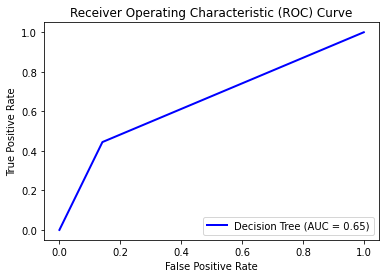

In [22]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

1) Performance evaluation of Random Forest from ROC and AUC
THe ROC curve starts with a steep increase of True positive rates which indicates a good performance after some threshold The performance falls showing an increase of False positive Rates
The AUC of 0.65 indicates the model is performing less than DecisionTree has fair ability to predict between the classes but needs a lot of optimization techniques as the ideal value is 1

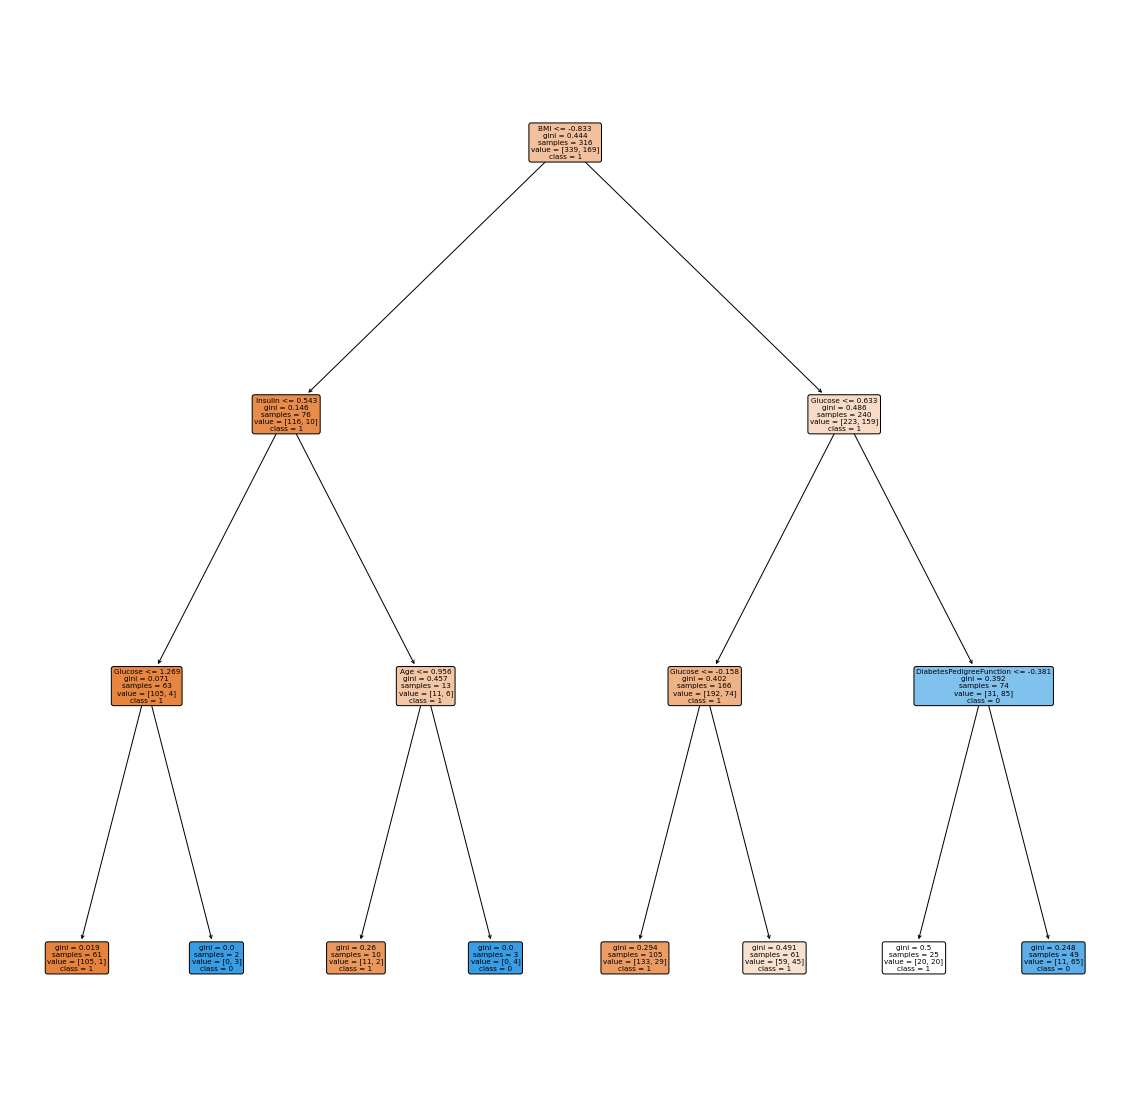

In [51]:
# RandomForest tree for the visualisation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42, max_depth=3) 

# Fit the classifier to the training data
rf.fit(Xtrainsc, y_train)

# Extract one tree from the forest (e.g., the first tree)
estimator = rf.estimators_[0]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))  

# Plot the tree
plot_tree(estimator, 
          feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                         'BMI', 'DiabetesPedigreeFunction', 'Age'],
          class_names=['1', '0'], 
          filled=True, 
          rounded=True)
plt.show()


In [52]:
print(f"Number of trees {rf.n_estimators}")

Number of trees 100


In [53]:
target.value_counts(normalize=True)

Outcome
0    0.690252
1    0.309748
Name: proportion, dtype: float64

In [38]:
def prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age):
    x=np.zeros(len(feats.columns))
    x[0]=Pregnancies
    x[1]=Glucose
    x[2]=BloodPressure
    x[3]=SkinThickness
    x[4]=Insulin
    x[5]=BMI
    x[6]=DiabetesPedigreeFunction
    x[7]=Age
    print (rf_model.predict([x])[0])
  #can you get me this rf model?

In [59]:
def prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):

    input_data = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])

    input_data = input_data.reshape(1, -1)
    

    scaled_data = sc.transform(input_data)

    prediction_result = rf_model.predict(scaled_data)[0] # rf_model was mentioned here right
    
    print(prediction_result)
    return prediction_result
# can we now try with html giving the explonatory variables as input yes for that u need a json file that will have ur columns, u need to index ur input for each column to put the info of the onehot encoded columns bro npw i need to go can u use this one and make sure ur app. py file and let me know ether it gives u output or not 
#once u have thi rf model or any other running makes sure that it is mentioned on this function then let me know 
# i have small doubt explain me this line reshape(1,-1)
#got it yes i think we can use this same transformation matrix in OneHot because once we convert the columns it is in horizontal but we can make vertical based on this may be u can run i m mixing few things up 
# it is trasformation matrix thing right now ur matrix like horzontal(list) we need to change it vertical(column 2D) right now it is list std scller needs an array 2d array

In [ ]:
# and bro for flask server use pycharm is vs code it si quite difficult i dont know how to server file on vs code on pycharm i know


In [58]:
prediction(4,140,72,35,0,30.6,0.627,50)

1


1

In [36]:
import pickle


In [54]:
# Save the model to a file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model,f)